In [35]:
from algorithm.utils.data.tf.dataimage import DataImage
import tensorflow as tf

In [36]:
dataset = DataImage(data_path="Input/dataset", split=0.2, resize=True, height='auto', width='auto', name="Electronic components dataset", batch_size=16)

In [37]:
dataset

Electronic components dataset
	Number of points: 1223
	Root location: Input/dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)


In [38]:
trainset = dataset.get_set(split="train")
validset = dataset.get_set(split="validation")

In [39]:
# get some random training images
dataiter = iter(trainset)
images, labels = next(dataiter)

In [40]:
images.shape, len(labels)

(TensorShape([16, 128, 128, 3]), 16)

In [41]:
images

<tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
array([[[[ 94.       , 181.       , 130.       ],
         [ 90.171875 , 179.46875  , 127.703125 ],
         [ 85.34375  , 181.4375   , 128.21875  ],
         ...,
         [ 73.       , 176.       , 120.       ],
         [ 73.       , 176.       , 120.       ],
         [ 73.       , 176.       , 120.       ]],

        [[ 94.       , 181.       , 130.       ],
         [ 90.171875 , 179.46875  , 127.703125 ],
         [ 85.34375  , 181.4375   , 128.21875  ],
         ...,
         [ 73.42969  , 176.42969  , 120.42969  ],
         [ 73.42969  , 176.42969  , 120.42969  ],
         [ 73.42969  , 176.42969  , 120.42969  ]],

        [[ 94.       , 181.       , 130.       ],
         [ 90.171875 , 179.46875  , 127.703125 ],
         [ 85.34375  , 181.4375   , 128.21875  ],
         ...,
         [ 74.38281  , 177.38281  , 121.38281  ],
         [ 74.38281  , 177.38281  , 121.38281  ],
         [ 74.38281  , 177.38281  , 121.38281

In [42]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'PINSMD', b'CAPACITOR', b'RESISTOR', b'RESISTOR', b'RESISTOR',
       b'X18Y4', b'PINSMD', b'X4Y18', b'PINTH', b'PINSMD', b'RESISTOR',
       b'X4Y18', b'PINTH', b'DIODE', b'X43Y55', b'PINTH'], dtype=object)>

In [43]:
class_names = dataset.labels

In [44]:
class_names

['C1210',
 'RELAIS',
 'C0805',
 'GATE',
 'R0603',
 'CASEC',
 'SMB',
 'OPENFIX',
 'PLCC2LED',
 'SFUSE',
 'PINSMD',
 'CAPACITOR',
 'ZENER',
 'WSK2512',
 'X18Y4',
 'R110H126',
 'OPTOISOLATOR',
 'TRANSFORMER',
 'C0603',
 'R63H40',
 'X50Y65',
 'RESISTOR',
 'SO8',
 'R01005',
 'TRANSISTOR',
 'INDUCTANCE',
 'R0402',
 'MOS',
 'DIGITAL',
 'R1206',
 'AUTIC',
 'X63H40',
 'MINIMELF',
 'R0805',
 'JUMPER',
 'X43Y55',
 'STRIP3',
 'X4Y18',
 'R2512',
 'CTELRJ45',
 'LED3',
 'SCR',
 'S5SOT23',
 'DIODE',
 'R20',
 'CONNECTOR',
 'VOLTAGEREGULATOR',
 '0805S',
 'X8Y11',
 'TRIAC',
 'SO16',
 'STRIP6',
 'OSCILLATOR',
 'PINTH',
 'LED',
 'R10',
 'FUSE']

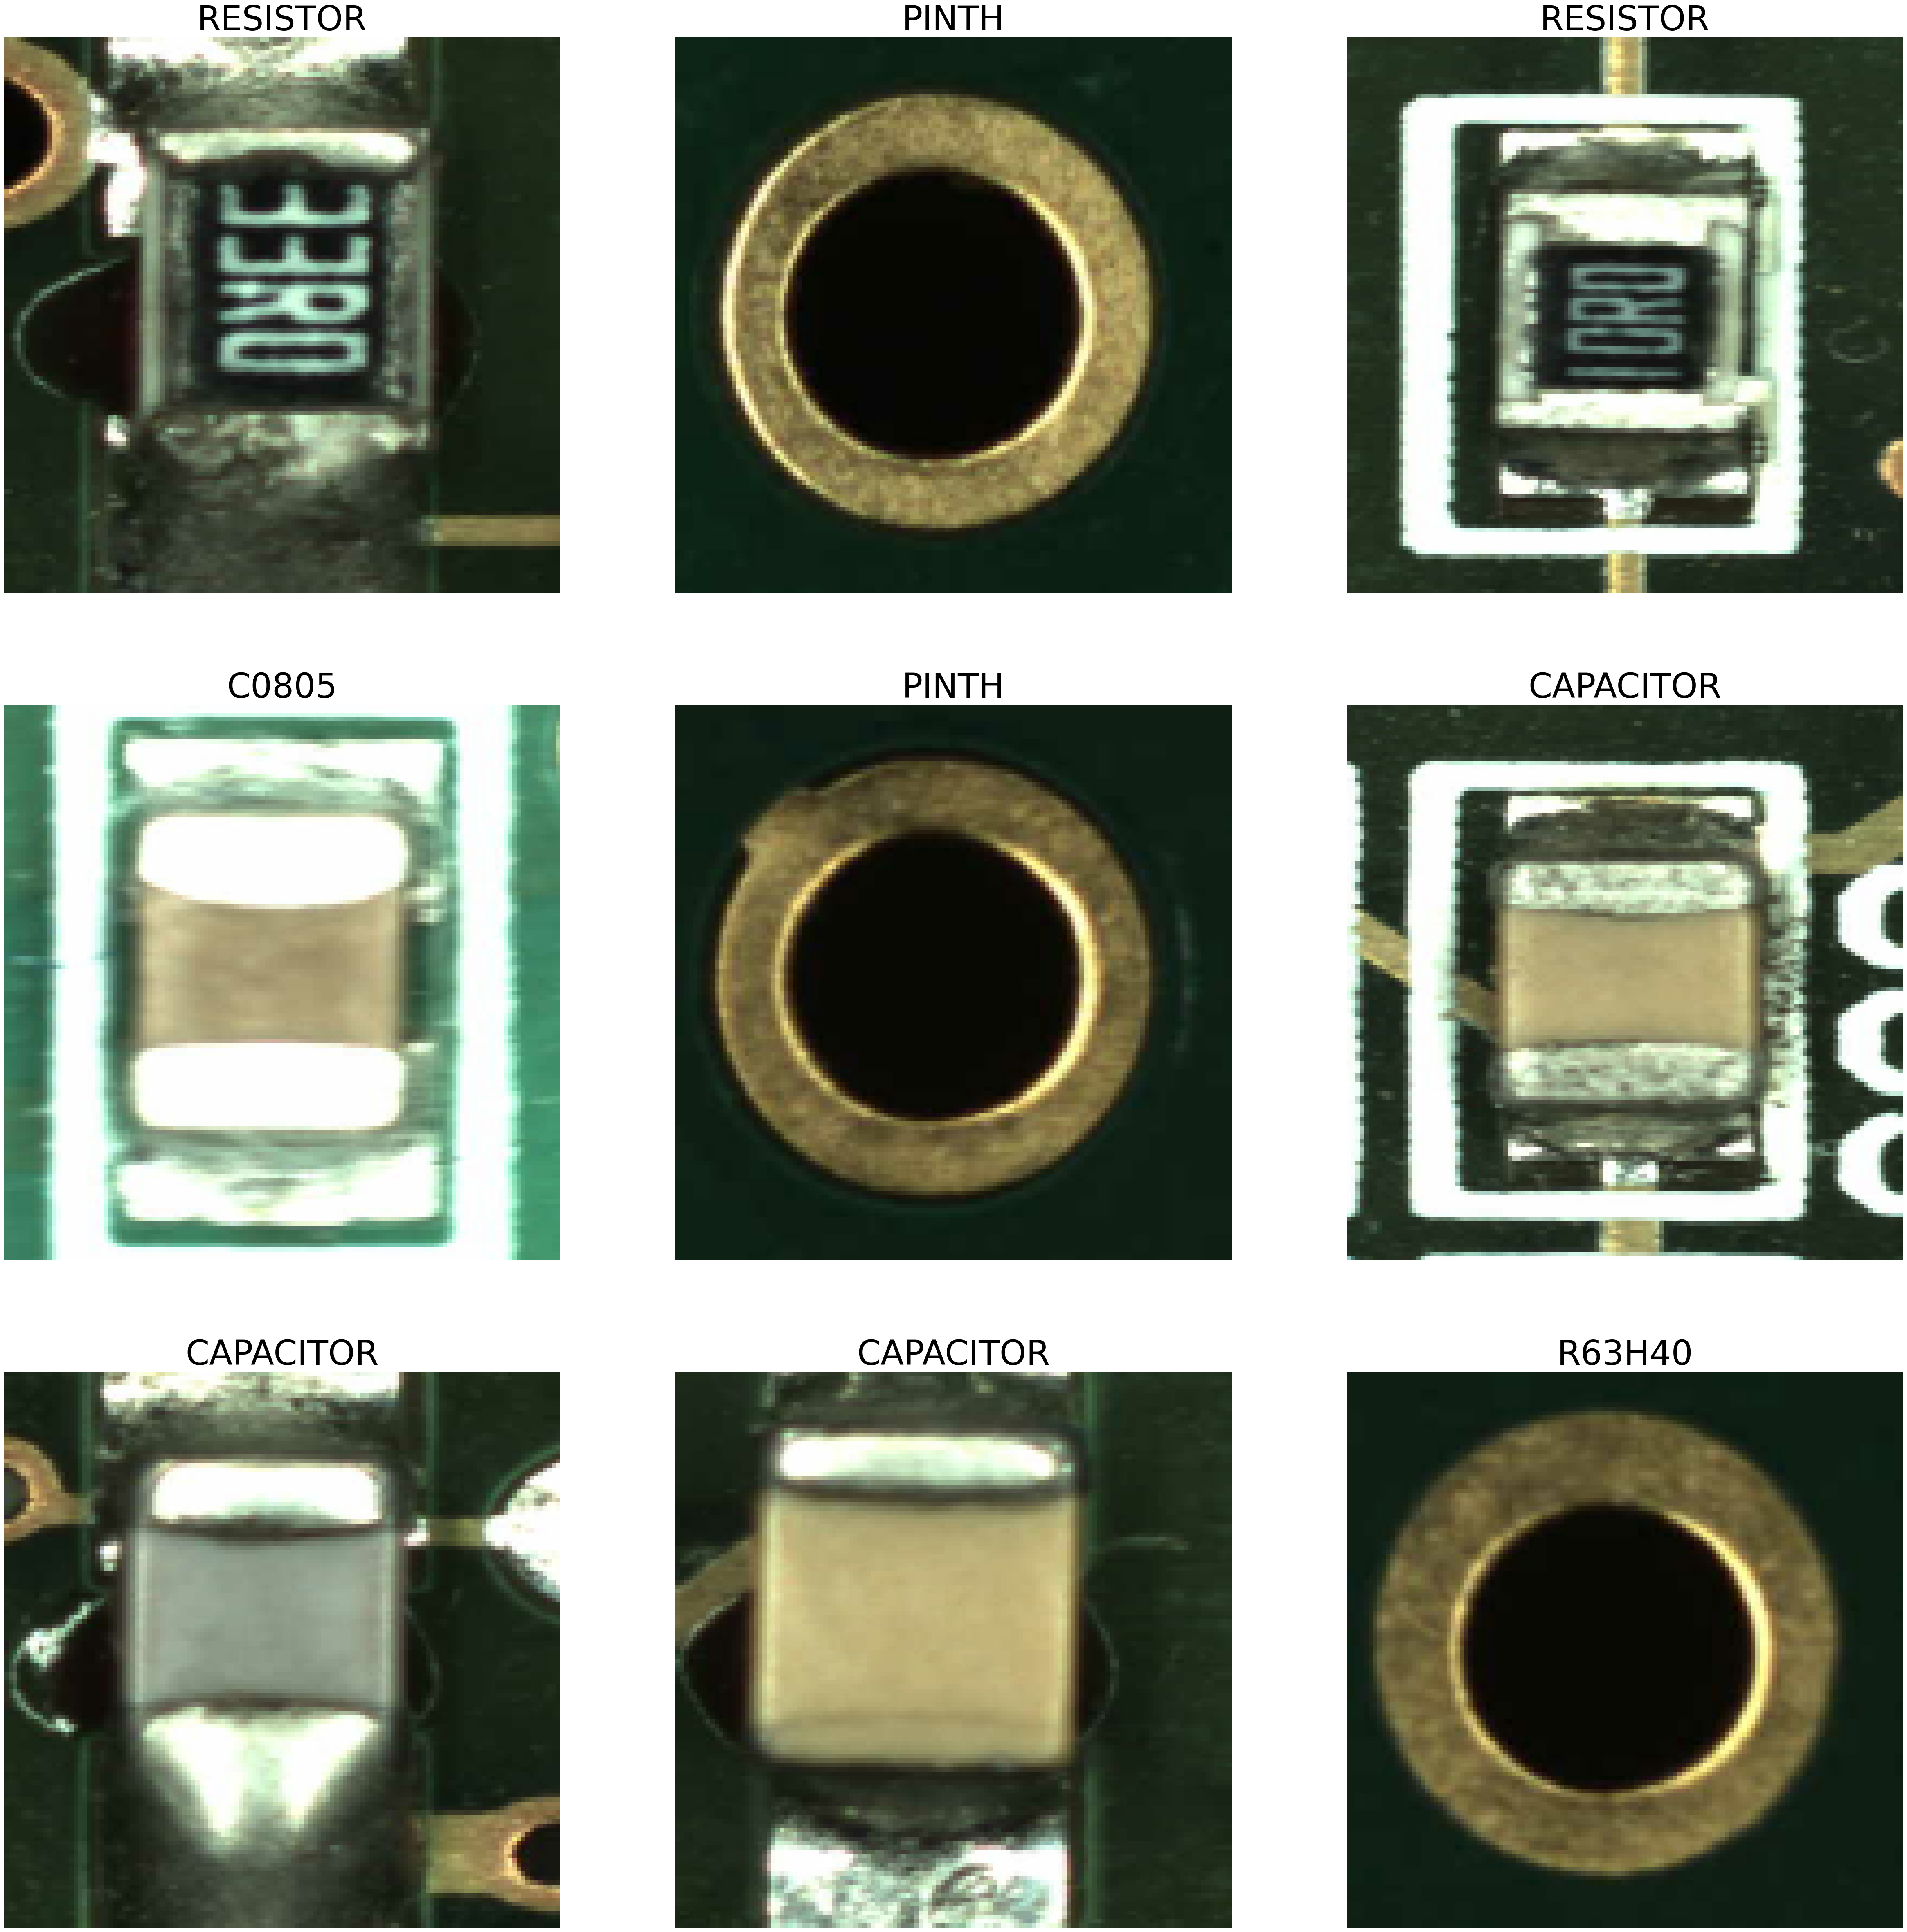

In [47]:
import matplotlib.pyplot as plt
image_batch, label_batch = next(iter(trainset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [48]:
normalization_layer = tf.keras.layers.Rescaling(1./255)